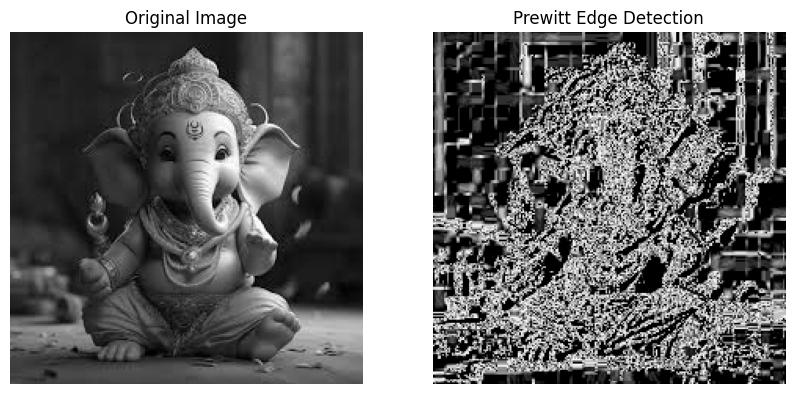

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('/content/images.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found. Please check the file path.")
else:
    # Step 2: Define the Prewitt operator kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)  # Kernel for X direction
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)  # Kernel for Y direction

    # Step 3: Apply the kernels using cv2.filter2D (convolution)
    gradient_x = cv2.filter2D(image, -1, kernel_x)  # Convolve with G_x
    gradient_y = cv2.filter2D(image, -1, kernel_y)  # Convolve with G_y

    # Step 4: Compute the magnitude of the gradient
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Step 5: Normalize the magnitude to be in the range [0, 255]
    gradient_magnitude = np.uint8(np.clip(gradient_magnitude / np.max(gradient_magnitude) * 255, 0, 255))

    # Step 6: Display the original and edge-detected images
    plt.figure(figsize=(10, 5))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot Prewitt edge-detected image
    plt.subplot(1, 2, 2)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title('Prewitt Edge Detection')
    plt.axis('off')

    plt.show()
